In [1]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [2]:
'''
BASIC LEVEL
'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline
plt.rcParams[ "figure.figsize" ] = (8, 6)
plt.rcParams[ "font.size" ] = 14

In [3]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies
with open('imdb_1000.csv', 'r') as f:
    movies = pd.read_csv(f)

movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


In [4]:
# check the number of rows and columns
movies.shape

(979, 6)

In [5]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [6]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [7]:
# sort the DataFrame by duration to find the shortest and longest movies
movies.sort_values("duration").head(1)
movies.sort_values("duration").tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


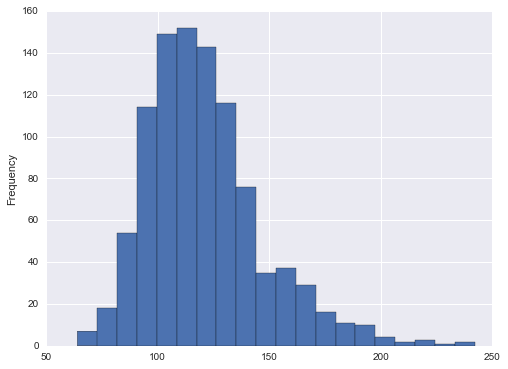

In [8]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind="hist", bins=20)

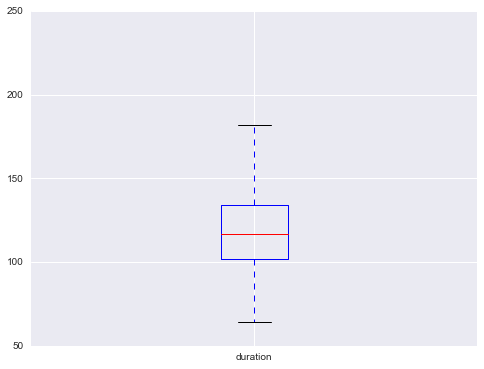

In [9]:
# use a box plot to display that same data
movies.duration.plot(kind="box")

In [10]:
'''
INTERMEDIATE LEVEL
'''

# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

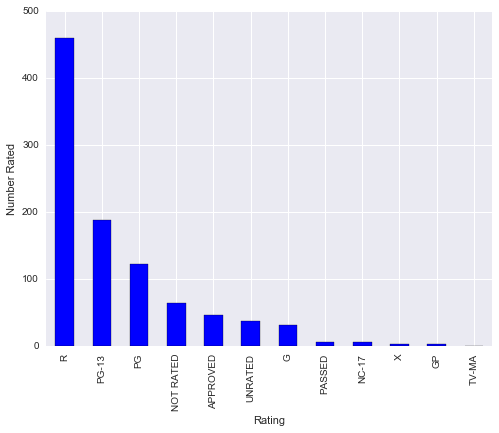

In [11]:
# use a visualization to display that same data, including a title and x and y labels
ax = movies.content_rating.value_counts().plot(kind="bar")
ax.set_xlabel("Rating")
ax.set_ylabel("Number Rated")

In [12]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace({"NOT RATED": "UNRATED", "APPROVED": "UNRATED", "PASSED": "UNRATED", "GP": "UNRATED"}, inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

In [13]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace({"X": "NC-17", "TV-MA": "NC-17"}, inplace=True)
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

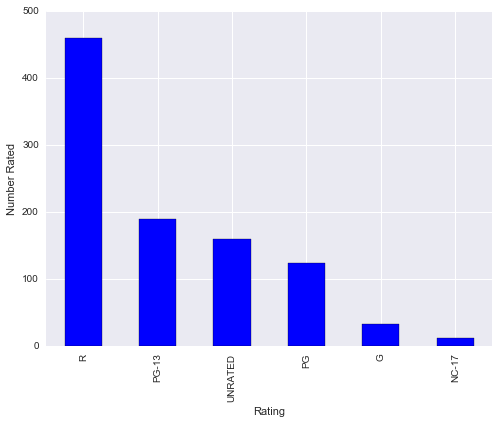

In [14]:
ax = movies.content_rating.value_counts().plot(kind="bar")
ax.set_xlabel("Rating")
ax.set_ylabel("Number Rated")

In [15]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [16]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]

# Butch Cassidy and the Sundance Kid, Where Eagles Dare, and True Grit
# Going to replace them with 'R'

movies.content_rating.fillna("R", inplace=True)

In [17]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print movies[movies.duration >= 120].star_rating.mean()

print movies[movies.duration < 120].star_rating.mean()

7.94889867841
7.83866666667


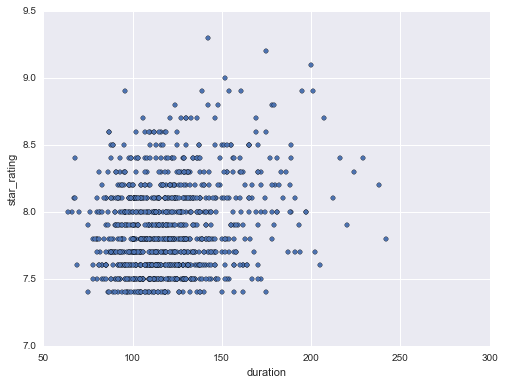

In [18]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind="scatter", x="duration", y="star_rating")

In [19]:
# calculate the average duration for each genre
movies.groupby("genre").duration.mean().sort_values()

genre
History       66.000000
Animation     96.596774
Film-Noir     97.333333
Horror       102.517241
Family       107.500000
Comedy       107.602564
Sci-Fi       109.000000
Fantasy      112.000000
Thriller     114.200000
Mystery      115.625000
Crime        122.298387
Action       126.485294
Drama        126.539568
Biography    131.844156
Adventure    134.840000
Western      136.666667
Name: duration, dtype: float64

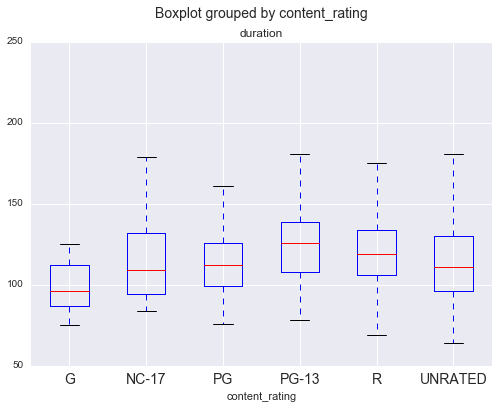

In [20]:
'''
ADVANCED LEVEL
'''

# visualize the relationship between content rating and duration
movies['content_rating_vals'] = movies.content_rating.map({"G": 0, "PG": 1, "PG-13": 2, "R": 3, "NC-17": 4, "UNRATED": 5})
movies.boxplot(column="duration", by="content_rating")

In [21]:
# determine the top rated movie (by star rating) for each genre


In [22]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates
movies[movies.duplicated("title", keep=False)].sort_values("title")



,star_rating,title,content_rating,genre,duration,actors_list,content_rating_vals
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",5
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",3
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",2
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",2
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",3
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",3
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",2
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",3


In [54]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies


In [56]:
# option 1: manually create a list of relevant genres, then filter using that list
genres = ["Drama", "Comedy", "Action", "Crime", "Biography", "Adventure", "Animation", "Horror", "Mystery"]
relevant = movies[movies.genre.isin(genres)]
relevant.groupby("genre").star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [65]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
counts = movies.genre.value_counts()
popular = counts[counts >= 10].index
movies[movies.genre.isin(popular)].groupby('genre').star_rating.mean()


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [66]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [68]:
# option 4: aggregate by count and mean, then filter using the count
ratings_with_count = movies.groupby('genre').star_rating.agg(['count', 'mean'])
ratings_with_count[genre_ratings['count'] >= 10]


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


In [28]:
'''
BONUS
'''

# Figure out something "interesting" using the actors data!


'\nBONUS\n'